In [ ]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [1]:
import eos
import numpy as np
import matplotlib.pyplot as plt

# path and filename settings
proj_path = '/home/bobeth/Work/digethic-AI-course/eos'
data_path = 'data'
data_mcmc_file_name = 'fit-BSM-PT-mcmc.csv'
data_pmc_file_name  = 'fit-BSM-PT-pmc.csv'

# MCMC parameters
mcmc_N_chains = 20
mcmc_preruns = 14
mcmc_pre_N = 3500
mcmc_N = 12000
mcmc_stride = 4

# hierarchical clustering
hc_r_crit = 1.3
hc_K_g = 6

# PMC parameters
pmc_step_N = 35000
pmc_steps = 20
pmc_final_N = 400000

# Define Analysis

General arguments for analysis

In [2]:
from eos_analysis_args import analysis_args

### Fit of form factor (FF) parameters from theory constraints only

In [3]:
th_analysis = eos.Analysis(**analysis_args)

th_analysis.parameters['B(*)->D(*)::n_f@HQET'].set(2.0)
th_analysis.parameters['B(*)->D(*)::a@HQET'].set(1.0)
#th_analysis.parameters['mass::B_d'].set(5.27942)
#th_analysis.parameters['mass::D_u'].set(1.86723)
#th_analysis.parameters['mass::D_u^*'].set(2.01000)
th_analysis.parameters['B_s(*)->D_s(*)::n_s@HQET'].set(1.0)
th_analysis.parameters['B_s(*)->D_s(*)::a@HQET'].set(1.0)
#th_analysis.parameters['mass::B_s'].set(5.36688)
#th_analysis.parameters['mass::D_u'].set(1.96834)
#th_analysis.parameters['mass::D_u^*'].set(2.1122)

# start point
##
## LP
th_analysis.parameters[    "B(*)->D(*)::xi'(1)@HQET"].set( -1.15)
th_analysis.parameters[   "B(*)->D(*)::xi''(1)@HQET"].set( +2.02)
th_analysis.parameters[  "B(*)->D(*)::xi'''(1)@HQET"].set( -3.90)
##
## SLP
th_analysis.parameters[  "B(*)->D(*)::chi_2(1)@HQET"].set( -0.07)
th_analysis.parameters[ "B(*)->D(*)::chi_2'(1)@HQET"].set( -0.02)
th_analysis.parameters["B(*)->D(*)::chi_2''(1)@HQET"].set( -0.01)
##
th_analysis.parameters[ "B(*)->D(*)::chi_3'(1)@HQET"].set( +0.04)
th_analysis.parameters["B(*)->D(*)::chi_3''(1)@HQET"].set( -0.11)
##
th_analysis.parameters[    "B(*)->D(*)::eta(1)@HQET"].set( +0.64)
th_analysis.parameters[   "B(*)->D(*)::eta'(1)@HQET"].set( +0.06)
th_analysis.parameters[  "B(*)->D(*)::eta''(1)@HQET"].set( -0.52)
##
## SSLP
th_analysis.parameters[    "B(*)->D(*)::l_1(1)@HQET"].set( +0.17)
th_analysis.parameters[   "B(*)->D(*)::l_1'(1)@HQET"].set( -5.80)
##
th_analysis.parameters[    "B(*)->D(*)::l_2(1)@HQET"].set( -1.60)
th_analysis.parameters[   "B(*)->D(*)::l_2'(1)@HQET"].set( -3.73)
##
th_analysis.parameters[    "B(*)->D(*)::l_3(1)@HQET"].set( -3.52)
th_analysis.parameters[   "B(*)->D(*)::l_3'(1)@HQET"].set( +5.12)
##
th_analysis.parameters[    "B(*)->D(*)::l_4(1)@HQET"].set( -2.33)
th_analysis.parameters[   "B(*)->D(*)::l_4'(1)@HQET"].set( -0.72)
##
th_analysis.parameters[    "B(*)->D(*)::l_5(1)@HQET"].set( +3.04)
th_analysis.parameters[   "B(*)->D(*)::l_5'(1)@HQET"].set( +0.18)
##
th_analysis.parameters[    "B(*)->D(*)::l_6(1)@HQET"].set( +2.33)
th_analysis.parameters[   "B(*)->D(*)::l_6'(1)@HQET"].set( +0.70)
##
th_analysis.parameters['CKM::abs(V_cb)'].set(40.0e-3)
th_analysis.parameters['CKM::arg(V_cb)'].set(0.0)

INFO:EOS:Creating analysis with 23 priors, 8 EOS-wide constraints, 7 global options, 6 manually-entered constraints and 0 fixed parameters.


RuntimeError: Constraint 'B(*)->D(*)::chi_2(1)' is unknown

### Fit of FF parameters and WET Wilson coefficients from theory + experimental constraints

In [4]:
analysis_args['likelihood'].append('B^0->(Dpi)^+l^-nubar::KinematicDistributionsAngularObservables@BBGJvD:2021A')
analysis_args['priors'].extend([
    # Wilson coefficients for the electron mode
    { 'parameter':         "cbenue::Re{cSR}",   'min':  -1.40,   'max':  +1.40,   'type': 'uniform' },
    { 'parameter':         "cbenue::Im{cSR}",   'min':  -1.40,   'max':  +1.40,   'type': 'uniform' },
    { 'parameter':         "cbenue::Re{cT}",    'min':  -0.80,   'max':  +0.80,   'type': 'uniform' },
    # Wilson coefficients for the muon mode
    { 'parameter':         "cbmunumu::Re{cSR}", 'min':  -1.40,   'max':  +1.40,   'type': 'uniform' },
    { 'parameter':         "cbmunumu::Im{cSR}", 'min':  -1.40,   'max':  +1.40,   'type': 'uniform' },
    { 'parameter':         "cbmunumu::Re{cT}",  'min':  -0.80,   'max':  +0.80,   'type': 'uniform' },
    { 'parameter':         "cbmunumu::Im{cT}",  'min':  -0.80,   'max':  +0.80,   'type': 'uniform' },
])

exp_analysis = eos.Analysis(**analysis_args)
##
exp_analysis.parameters['CKM::abs(V_cb)'].set(40.0e-3)
exp_analysis.parameters['CKM::arg(V_cb)'].set(0.0)
##
exp_analysis.parameters[  "cbenue::Re{cSR}"].set(0.0)
exp_analysis.parameters[  "cbenue::Im{cSR}"].set(0.0)
exp_analysis.parameters[  "cbenue::Re{cT}" ].set(0.0)
##
exp_analysis.parameters["cbmunumu::Re{cSR}"].set(0.0)
exp_analysis.parameters["cbmunumu::Im{cSR}"].set(0.0)
exp_analysis.parameters["cbmunumu::Re{cT}" ].set(0.0)
exp_analysis.parameters["cbmunumu::Im{cT}" ].set(0.0)

INFO:EOS:Creating analysis with 30 priors, 9 EOS-wide constraints, 7 global options, 6 manually-entered constraints and 0 fixed parameters.
ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
@1642455635: [ERROR [ConcreteObservableEntry.make]] ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'U' to value 'c', overriding user-provided value 'c'
Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
@1642455635: [ERROR [ConcreteObservableEntry.make]] ERROR:EOS:[ConcreteObservableEntry.make] Observable 'B->D^*lnu::BR_CP_specific' forces option key 'I' to value '1/2', overriding user-provided value '1/2'
Observable 'B->D^*lnu::BR_CP_specific' forces option key 'U' to value 'c', overriding user-provided value 'c'
@1642455635: [ERROR [ConcreteObservableEntry.make]] ERROR:EOS:[Concrete

## Goodness-of-fit (GOF) without Markov Chains

Only from theory constraints:

In [5]:
%time th_analysis.optimize()
%time th_analysis.goodness_of_fit()

CPU times: user 9.25 s, sys: 8.63 s, total: 17.9 s
Wall time: 6.59 s
CPU times: user 619 µs, sys: 521 µs, total: 1.14 ms
Wall time: 330 µs


constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0000,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0213,1
B(*)->D(*)::eta(1),0.0492,1
B->D::f_++f_0@FNAL+MILC:2015B,3.6995,7
B->D::f_++f_0@HPQCD:2015A,3.1833,5
B->D::f_T/f_+,0.0031,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",2.9590,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.0104,1


initialize experimental analysis with **best-fit point** (BFP) from theory-only FF fit:

In [6]:
for p in th_analysis.parameters:
    exp_analysis.parameters[p.name()].set(p.evaluate())
%time display(exp_analysis.goodness_of_fit())

constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0000,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0213,1
B(*)->D(*)::eta(1),0.0492,1
B->D::f_++f_0@FNAL+MILC:2015B,3.6995,7
B->D::f_++f_0@HPQCD:2015A,3.1833,5
B->D::f_T/f_+,0.0031,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",2.9590,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.0104,1


CPU times: user 355 ms, sys: 0 ns, total: 355 ms
Wall time: 39.1 ms


In [7]:
%time exp_analysis.optimize()
%time exp_analysis.goodness_of_fit()

CPU times: user 2h 16min 35s, sys: 18.8 s, total: 2h 16min 53s
Wall time: 11min 35s
CPU times: user 521 ms, sys: 67 µs, total: 521 ms
Wall time: 45.7 ms


constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0002,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0058,1
B(*)->D(*)::eta(1),0.0302,1
B->D::f_++f_0@FNAL+MILC:2015B,3.7304,7
B->D::f_++f_0@HPQCD:2015A,3.3272,5
B->D::f_T/f_+,0.0049,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD:2018A",4.3290,33
B->D^*::A_1[s_max]@HFLAV:2019A,0.1598,1


# Fit with Markov Chains

In [8]:
%%time

chains = []
log_posterior = []
for i in range(mcmc_N_chains):
    print('Chain : ', i+1)
    rng = np.random.mtrand.RandomState(seed=12345 + i)
    start_point = [rng.uniform(low=b[0], high=b[1]) for b in exp_analysis.bounds]
    samples, log_weights = exp_analysis.sample(
        preruns = mcmc_preruns,
        pre_N = mcmc_pre_N,
        N = mcmc_N,
        stride = mcmc_stride, 
        start_point=start_point, rng=rng) #, cov_scale = 1e-11)
    chains.extend(samples)
    log_posterior.extend(log_weights)

chains = np.array(chains)
log_posterior = np.array(log_posterior)

Chain :  1


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:02<13:29, 62.25s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:08<19:56, 99.69s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:51<23:34, 128.62s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   3%
Pre-runs:  29%|██▊       | 4/14 [08:33<23:40, 142.06s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  10%
Pre-runs:  36%|███▌      | 5/14 [11:15<22:23, 149.26s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  26%
Pre-runs:  43%|████▎     | 6/14 [14:06<20:52, 156.57s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  37%
Pre-runs:  50%|█████     | 7/14 [17:04<19:05, 163.67s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  37%
Pre-runs:  57%|█████▋    | 8/14 [19:55<16:35, 165.87s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  35%
Pre-runs:  64%|██████▍   | 9/14 [22:45<13:56, 167.22s/it]INFO:

Chain :  2


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:37<08:06, 37.43s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [02:33<16:46, 83.87s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [04:49<19:41, 107.41s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  29%|██▊       | 4/14 [07:14<20:22, 122.20s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  19%
Pre-runs:  36%|███▌      | 5/14 [09:39<19:33, 130.39s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  29%
Pre-runs:  43%|████▎     | 6/14 [12:03<18:02, 135.30s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  39%
Pre-runs:  50%|█████     | 7/14 [14:31<16:16, 139.48s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  36%
Pre-runs:  57%|█████▋    | 8/14 [16:57<14:09, 141.56s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  28%
Pre-runs:  64%|██████▍   | 9/14 [19:23<11:53, 142.79s/it]INFO:

Chain :  3


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:17<16:49, 77.69s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [03:42<23:24, 117.05s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [06:07<23:48, 129.86s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  29%|██▊       | 4/14 [08:32<22:39, 135.90s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  17%
Pre-runs:  36%|███▌      | 5/14 [11:00<21:03, 140.34s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  30%
Pre-runs:  43%|████▎     | 6/14 [13:30<19:08, 143.55s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  50%|█████     | 7/14 [15:58<16:54, 144.91s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  36%
Pre-runs:  57%|█████▋    | 8/14 [18:24<14:31, 145.26s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  30%
Pre-runs:  64%|██████▍   | 9/14 [20:51<12:09, 145.82s/it]INFO

Chain :  4


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:05<14:15, 65.80s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:43<24:00, 120.08s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [06:27<25:39, 139.96s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is  11%
Pre-runs:  29%|██▊       | 4/14 [09:03<24:21, 146.12s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  30%
Pre-runs:  36%|███▌      | 5/14 [11:43<22:41, 151.22s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  40%
Pre-runs:  43%|████▎     | 6/14 [14:19<20:23, 152.89s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  36%
Pre-runs:  50%|█████     | 7/14 [16:57<18:01, 154.55s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  29%
Pre-runs:  57%|█████▋    | 8/14 [19:34<15:32, 155.36s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  37%
Pre-runs:  64%|██████▍   | 9/14 [22:14<13:04, 156.91s/it]INFO

Chain :  5


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:   7%|▋         | 1/14 [00:27<05:51, 27.06s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [02:49<19:00, 95.06s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [05:14<21:35, 117.77s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is  11%
Pre-runs:  29%|██▊       | 4/14 [07:39<21:24, 128.49s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  30%
Pre-runs:  36%|███▌      | 5/14 [10:04<20:09, 134.39s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  39%
Pre-runs:  43%|████▎     | 6/14 [12:29<18:23, 137.96s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  36%
Pre-runs:  50%|█████     | 7/14 [14:54<16:21, 140.25s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  28%
Pre-runs:  57%|█████▋    | 8/14 [17:19<14:10, 141.75s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  64%|██████▍   | 9/14 [19:43<11:53, 142.69s/it]INFO:

Chain :  6


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:20<04:29, 20.72s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [01:45<11:39, 58.32s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [04:44<20:46, 113.35s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   6%
Pre-runs:  29%|██▊       | 4/14 [07:26<22:05, 132.58s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  14%
Pre-runs:  36%|███▌      | 5/14 [10:06<21:23, 142.58s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  33%
Pre-runs:  43%|████▎     | 6/14 [12:37<19:22, 145.32s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  44%
Pre-runs:  50%|█████     | 7/14 [15:02<16:57, 145.29s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  42%
Pre-runs:  57%|█████▋    | 8/14 [17:27<14:31, 145.23s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  39%
Pre-runs:  64%|██████▍   | 9/14 [19:54<12:08, 145.78s/it]INFO:

Chain :  7


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:38<08:20, 38.47s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [02:44<17:57, 89.79s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:09<21:05, 115.07s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   4%
Pre-runs:  29%|██▊       | 4/14 [07:34<21:09, 126.94s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  16%
Pre-runs:  36%|███▌      | 5/14 [09:51<19:34, 130.48s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  24%
Pre-runs:  43%|████▎     | 6/14 [12:11<17:51, 133.93s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  34%
Pre-runs:  50%|█████     | 7/14 [14:37<16:03, 137.62s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  39%
Pre-runs:  57%|█████▋    | 8/14 [17:02<14:00, 140.02s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  38%
Pre-runs:  64%|██████▍   | 9/14 [19:27<11:48, 141.71s/it]INFO:

Chain :  8


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:   7%|▋         | 1/14 [00:35<07:39, 35.38s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [02:46<18:21, 91.77s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [05:13<21:25, 116.86s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is  11%
Pre-runs:  29%|██▊       | 4/14 [07:39<21:26, 128.61s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  31%
Pre-runs:  36%|███▌      | 5/14 [10:10<20:29, 136.60s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  34%
Pre-runs:  43%|████▎     | 6/14 [12:59<19:40, 147.53s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  44%
Pre-runs:  50%|█████     | 7/14 [15:49<18:03, 154.80s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  41%
Pre-runs:  57%|█████▋    | 8/14 [18:20<15:21, 153.60s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  36%
Pre-runs:  64%|██████▍   | 9/14 [20:58<12:54, 154.90s/it]INFO:

Chain :  9


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:17<16:49, 77.63s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [03:29<21:52, 109.36s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:54<23:03, 125.73s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  29%|██▊       | 4/14 [08:19<22:14, 133.47s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  17%
Pre-runs:  36%|███▌      | 5/14 [10:45<20:39, 137.73s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  27%
Pre-runs:  43%|████▎     | 6/14 [13:10<18:42, 140.28s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  37%
Pre-runs:  50%|█████     | 7/14 [15:35<16:33, 141.90s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  32%
Pre-runs:  57%|█████▋    | 8/14 [18:00<14:17, 142.98s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  39%
Pre-runs:  64%|██████▍   | 9/14 [20:26<11:58, 143.70s/it]INFO

Chain :  10


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:46<10:00, 46.20s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:08<20:30, 102.53s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:39<22:51, 124.72s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is  10%
Pre-runs:  29%|██▊       | 4/14 [08:27<23:37, 141.76s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  26%
Pre-runs:  36%|███▌      | 5/14 [11:28<23:22, 155.86s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  36%
Pre-runs:  43%|████▎     | 6/14 [14:31<22:02, 165.30s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  35%
Pre-runs:  50%|█████     | 7/14 [17:33<19:55, 170.78s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  33%
Pre-runs:  57%|█████▋    | 8/14 [20:47<17:48, 178.09s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  64%|██████▍   | 9/14 [23:51<14:59, 179.88s/it]INFO

Chain :  11


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:52<11:25, 52.69s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:10<20:34, 102.89s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [06:11<25:21, 138.33s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  29%|██▊       | 4/14 [09:11<25:50, 155.09s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  21%
Pre-runs:  36%|███▌      | 5/14 [12:12<24:38, 164.30s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  32%
Pre-runs:  43%|████▎     | 6/14 [15:12<22:37, 169.75s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  50%|█████     | 7/14 [18:13<20:12, 173.25s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  31%
Pre-runs:  57%|█████▋    | 8/14 [21:13<17:33, 175.57s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  37%
Pre-runs:  64%|██████▍   | 9/14 [24:13<14:44, 176.87s/it]INFO

Chain :  12


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:32<07:02, 32.53s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [02:44<18:12, 91.00s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:31<23:00, 125.52s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   1%
Pre-runs:  29%|██▊       | 4/14 [08:28<24:21, 146.12s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is   3%
Pre-runs:  36%|███▌      | 5/14 [11:06<22:31, 150.17s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  13%
Pre-runs:  43%|████▎     | 6/14 [13:52<20:45, 155.64s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  22%
Pre-runs:  50%|█████     | 7/14 [16:37<18:31, 158.82s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  31%
Pre-runs:  57%|█████▋    | 8/14 [19:25<16:10, 161.81s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  39%
Pre-runs:  64%|██████▍   | 9/14 [22:18<13:45, 165.06s/it]INFO:

Chain :  13


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:43<09:23, 43.37s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [03:05<20:14, 101.20s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:57<24:30, 133.67s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   4%
Pre-runs:  29%|██▊       | 4/14 [08:46<24:38, 147.87s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  16%
Pre-runs:  36%|███▌      | 5/14 [11:39<23:29, 156.66s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  26%
Pre-runs:  43%|████▎     | 6/14 [14:32<21:39, 162.43s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  33%
Pre-runs:  50%|█████     | 7/14 [17:13<18:52, 161.84s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  40%
Pre-runs:  57%|█████▋    | 8/14 [19:58<16:16, 162.77s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  38%
Pre-runs:  64%|██████▍   | 9/14 [22:27<13:13, 158.63s/it]INFO

Chain :  14


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   0%
Pre-runs:   7%|▋         | 1/14 [00:53<11:32, 53.26s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:02<19:37, 98.16s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [05:27<21:54, 119.47s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is  16%
Pre-runs:  29%|██▊       | 4/14 [07:52<21:34, 129.47s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  20%
Pre-runs:  36%|███▌      | 5/14 [10:17<20:15, 135.02s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  31%
Pre-runs:  43%|████▎     | 6/14 [12:42<18:26, 138.36s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  37%
Pre-runs:  50%|█████     | 7/14 [15:07<16:23, 140.48s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  33%
Pre-runs:  57%|█████▋    | 8/14 [17:31<14:11, 141.86s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  39%
Pre-runs:  64%|██████▍   | 9/14 [19:56<11:53, 142.80s/it]INFO:

Chain :  15


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:07<14:39, 67.67s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:18<20:55, 104.61s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:43<22:33, 123.02s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   6%
Pre-runs:  29%|██▊       | 4/14 [08:07<21:56, 131.63s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  18%
Pre-runs:  36%|███▌      | 5/14 [10:31<20:22, 135.84s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  28%
Pre-runs:  43%|████▎     | 6/14 [12:56<18:31, 138.90s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  30%
Pre-runs:  50%|█████     | 7/14 [15:20<16:26, 140.86s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  36%
Pre-runs:  57%|█████▋    | 8/14 [17:45<14:12, 142.14s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  36%
Pre-runs:  64%|██████▍   | 9/14 [20:10<11:55, 143.02s/it]INFO

Chain :  16


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:48<10:35, 48.89s/it]INFO:EOS:Prerun 1 out of 14
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [02:24<15:18, 76.53s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [04:43<19:14, 105.00s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   5%
Pre-runs:  29%|██▊       | 4/14 [07:08<20:07, 120.75s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  18%
Pre-runs:  36%|███▌      | 5/14 [09:33<19:24, 129.42s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  30%
Pre-runs:  43%|████▎     | 6/14 [11:58<17:57, 134.67s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  37%
Pre-runs:  50%|█████     | 7/14 [14:23<16:06, 138.00s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance 

Chain :  17


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:54<11:42, 54.05s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [03:11<20:38, 103.20s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:35<22:21, 121.97s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   4%
Pre-runs:  29%|██▊       | 4/14 [08:00<21:50, 131.01s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  16%
Pre-runs:  36%|███▌      | 5/14 [10:25<20:24, 136.00s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  25%
Pre-runs:  43%|████▎     | 6/14 [12:50<18:32, 139.02s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  35%
Pre-runs:  50%|█████     | 7/14 [15:15<16:26, 140.95s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  32%
Pre-runs:  57%|█████▋    | 8/14 [17:40<14:13, 142.19s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  38%
Pre-runs:  64%|██████▍   | 9/14 [20:05<11:55, 143.04s/it]INFO

Chain :  18


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [00:48<10:36, 48.95s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [02:21<14:55, 74.66s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   2%
Pre-runs:  21%|██▏       | 3/14 [04:46<19:33, 106.69s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   4%
Pre-runs:  29%|██▊       | 4/14 [07:11<20:17, 121.75s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  18%
Pre-runs:  36%|███▌      | 5/14 [09:36<19:30, 130.08s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  25%
Pre-runs:  43%|████▎     | 6/14 [12:01<18:01, 135.14s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  50%|█████     | 7/14 [14:25<16:08, 138.31s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  38%
Pre-runs:  57%|█████▋    | 8/14 [16:50<14:02, 140.40s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  33%
Pre-runs:  64%|██████▍   | 9/14 [19:15<11:48, 141.79s/it]INFO:

Chain :  19


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:18<17:05, 78.91s/it]INFO:EOS:Prerun 1 out of 14


INFO:EOS:Prerun 1: acceptance rate is   0%
Pre-runs:  14%|█▍        | 2/14 [03:37<22:48, 114.03s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:56<23:02, 125.64s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   6%
Pre-runs:  29%|██▊       | 4/14 [08:21<22:12, 133.22s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  20%
Pre-runs:  36%|███▌      | 5/14 [10:46<20:36, 137.44s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  32%
Pre-runs:  43%|████▎     | 6/14 [13:11<18:39, 139.94s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  41%
Pre-runs:  50%|█████     | 7/14 [15:36<16:31, 141.57s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance rate is  37%
Pre-runs:  57%|█████▋    | 8/14 [18:01<14:15, 142.62s/it]INFO:EOS:Prerun 8 out of 14
INFO:EOS:Prerun 8: acceptance rate is  34%
Pre-runs:  64%|██████▍   | 9/14 [20:26<11:56, 143.34s/it]INFO

Chain :  20


Pre-runs:   0%|          | 0/14 [00:00<?, ?it/s]INFO:EOS:Prerun 0 out of 14
INFO:EOS:Prerun 0: acceptance rate is   1%
Pre-runs:   7%|▋         | 1/14 [01:04<13:54, 64.20s/it]INFO:EOS:Prerun 1 out of 14
INFO:EOS:Prerun 1: acceptance rate is   1%
Pre-runs:  14%|█▍        | 2/14 [02:57<18:35, 92.93s/it]INFO:EOS:Prerun 2 out of 14
INFO:EOS:Prerun 2: acceptance rate is   1%
Pre-runs:  21%|██▏       | 3/14 [05:21<21:19, 116.34s/it]INFO:EOS:Prerun 3 out of 14
INFO:EOS:Prerun 3: acceptance rate is   3%
Pre-runs:  29%|██▊       | 4/14 [07:46<21:15, 127.60s/it]INFO:EOS:Prerun 4 out of 14
INFO:EOS:Prerun 4: acceptance rate is  17%
Pre-runs:  36%|███▌      | 5/14 [10:11<20:04, 133.84s/it]INFO:EOS:Prerun 5 out of 14
INFO:EOS:Prerun 5: acceptance rate is  31%
Pre-runs:  43%|████▎     | 6/14 [12:36<18:20, 137.59s/it]INFO:EOS:Prerun 6 out of 14
INFO:EOS:Prerun 6: acceptance rate is  38%
Pre-runs:  50%|█████     | 7/14 [15:00<16:19, 139.98s/it]INFO:EOS:Prerun 7 out of 14
INFO:EOS:Prerun 7: acceptance 

CPU times: user 11d 11h 45min 51s, sys: 41min 2s, total: 11d 12h 26min 53s
Wall time: 22h 43min 34s


### Save MCMC results

In [9]:
parameter_names = [p.name() for p in exp_analysis.varied_parameters]

import pandas as pd

df_mcmc = pd.DataFrame(chains, columns=parameter_names)
df_mcmc['posterior'] = np.exp(log_posterior)
df_mcmc['log_posterior'] = log_posterior

In [10]:
import os

fn = os.path.join(proj_path, data_path, data_mcmc_file_name)
df_mcmc.to_csv(fn, index=False)

### Reload MCMC results

In [7]:
import pandas as pd
import os

fn = os.path.join(proj_path, data_path, data_mcmc_file_name)
df_mcmc = pd.read_csv(fn, sep=",", header=0)
df_mcmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   B(*)->D(*)::xi'(1)@HQET      240000 non-null  float64
 1   B(*)->D(*)::xi''(1)@HQET     240000 non-null  float64
 2   B(*)->D(*)::xi'''(1)@HQET    240000 non-null  float64
 3   B(*)->D(*)::chi_2(1)@HQET    240000 non-null  float64
 4   B(*)->D(*)::chi_2'(1)@HQET   240000 non-null  float64
 5   B(*)->D(*)::chi_2''(1)@HQET  240000 non-null  float64
 6   B(*)->D(*)::chi_3'(1)@HQET   240000 non-null  float64
 7   B(*)->D(*)::chi_3''(1)@HQET  240000 non-null  float64
 8   B(*)->D(*)::eta(1)@HQET      240000 non-null  float64
 9   B(*)->D(*)::eta'(1)@HQET     240000 non-null  float64
 10  B(*)->D(*)::eta''(1)@HQET    240000 non-null  float64
 11  B(*)->D(*)::l_1(1)@HQET      240000 non-null  float64
 12  B(*)->D(*)::l_1'(1)@HQET     240000 non-null  float64
 13 

In [8]:
log_posterior = df_mcmc['log_posterior'].to_numpy()
len(log_posterior)

240000

In [9]:
chains = df_mcmc.drop(columns=['posterior', 'log_posterior']).to_numpy()
chains.shape

(240000, 30)

### Inspect and group Markov chains (MC)

In [10]:
mc_chains = []
mc_posterior = []
for i in range(0, len(chains), mcmc_N):
        mc_chains.append(chains[i:i + mcmc_N])
        mc_posterior.append(log_posterior[i:i + mcmc_N])

chains_sum = np.sum(chains)
poster_sum = np.sum(log_posterior)
np.isnan(chains_sum), np.isinf(chains_sum), np.isnan(poster_sum), np.isinf(poster_sum),
        
for i, p in enumerate(mc_posterior):
    res = np.where(p == np.max(p))
    print(f"Chain = {i+1:2d},   "\
          f"Log-posterior max = {p.max():5.2f}, min = {p.min():5.2f},   "\
          f"   Indices of samples with max-Posterior: {res}")

Chain =  1,   Log-posterior max = 146.76, min = 120.16,      Indices of samples with max-Posterior: (array([11416, 11417, 11418]),)
Chain =  2,   Log-posterior max = 146.28, min = 120.83,      Indices of samples with max-Posterior: (array([6939, 6940]),)
Chain =  3,   Log-posterior max = 146.93, min = 123.92,      Indices of samples with max-Posterior: (array([6911]),)
Chain =  4,   Log-posterior max = 146.93, min = 119.19,      Indices of samples with max-Posterior: (array([6722, 6723]),)
Chain =  5,   Log-posterior max = 147.16, min = 120.41,      Indices of samples with max-Posterior: (array([6717, 6718, 6719, 6720]),)
Chain =  6,   Log-posterior max = 147.36, min = 117.46,      Indices of samples with max-Posterior: (array([8744]),)
Chain =  7,   Log-posterior max = 146.54, min = 117.89,      Indices of samples with max-Posterior: (array([9511]),)
Chain =  8,   Log-posterior max = 146.52, min = 116.11,      Indices of samples with max-Posterior: (array([8533, 8534]),)
Chain =  9,  

In [11]:
len(mc_chains[0]), len(mc_posterior[0])

(12000, 12000)

In [12]:
from pypmc.mix_adapt.r_value import r_group

indices = np.arange(mc_chains[0].shape[1])
res = r_group([np.mean(chain_values.T[indices], axis=1) for chain_values in mc_chains],
              [np.var (chain_values.T[indices], axis=1, ddof=1) for chain_values in mc_chains],
              n=mcmc_N, critical_r=hc_r_crit, approx=False)
print(f"Number of groups = {len(res)} for critical_r = {hc_r_crit} \nGroups")
for g_ix, g in enumerate(res):
    print(f"{g_ix+1:2d}: {g}")

Number of groups = 4 for critical_r = 1.3 
Groups
 1: [0, 1, 3, 7, 8, 13, 15, 17, 18, 19]
 2: [2]
 3: [4, 5, 6, 9, 10, 12, 14, 16]
 4: [11]


## Plots

In [13]:
len(exp_analysis.varied_parameters)

30

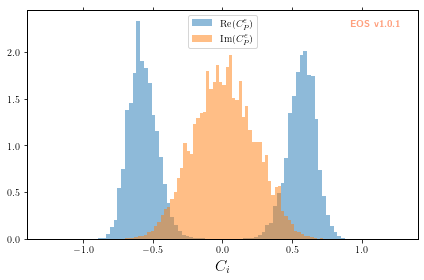

In [14]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-1.4,  1.4], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_P^e)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': chains[:, 24-1], 'log_weights': log_posterior }},
        { 'label': r'${\rm Im}(C_P^e)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': chains[:, 25-1], 'log_weights': log_posterior }},
    ]
}
eos.plot.Plotter(plot_args).plot()

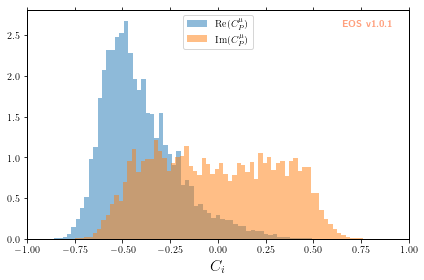

In [15]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-1.0,  1.0], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_P^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': chains[:, 27-1], 'log_weights': log_posterior }},
        { 'label': r'${\rm Im}(C_P^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': chains[:, 28-1], 'log_weights': log_posterior }},
    
    ]
}
eos.plot.Plotter(plot_args).plot()

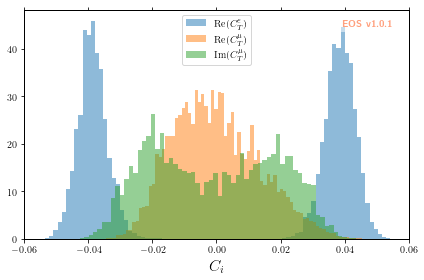

In [16]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-0.06,  0.06], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_T^e)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': chains[:, 26-1], 'log_weights': log_posterior }},
        { 'label': r'${\rm Re}(C_T^\mu)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': chains[:, 29-1], 'log_weights': log_posterior }},
        { 'label': r'${\rm Im}(C_T^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': chains[:, 30-1], 'log_weights': log_posterior }},
    ]
}
eos.plot.Plotter(plot_args).plot()

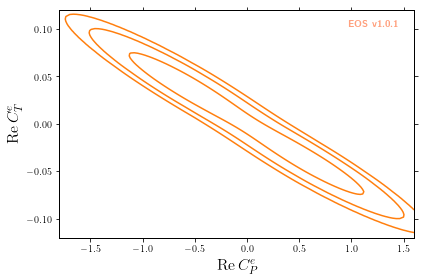

In [19]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_P^e$', 'range': [-1.8,  +1.6],  'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Re}\,C_T^e$', 'range': [-0.12, +0.12], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-2.0, +2.0], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (24-1, 26-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

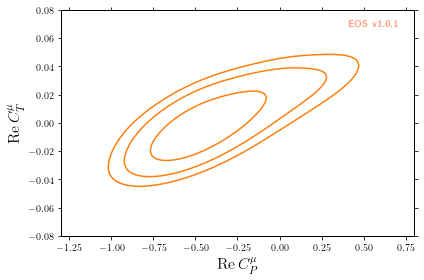

In [20]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_P^\mu$', 'range': [-1.3, 0.8], 'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Re}\,C_T^\mu$', 'range': [-0.08, 0.08], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-1.8, 1.8], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (27-1, 29-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

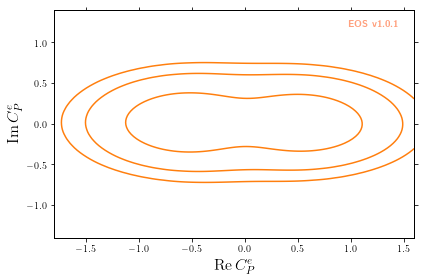

In [21]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_P^e$', 'range': [-1.8, 1.6], 'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Im}\,C_P^e$', 'range': [-1.4, 1.4], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-1.8, 1.8], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (24-1, 25-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

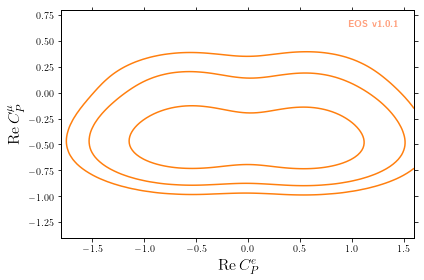

In [22]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_P^e$',   'range': [-1.8, 1.6], 'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Re}\,C_P^\mu$', 'range': [-1.4, 0.8], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-1.1, 0.0], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (24-1, 27-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

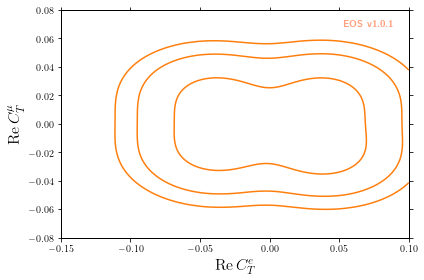

In [23]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_T^e$',   'range': [-0.15, 0.10],  'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Re}\,C_T^\mu$', 'range': [-0.08, 0.08], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [+0.01, 0.07], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (26-1, 30-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

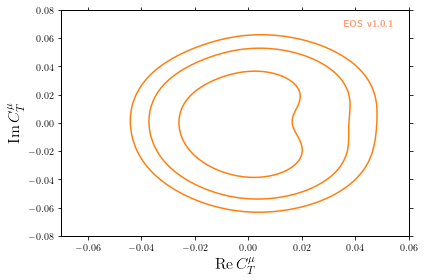

In [24]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_T^\mu$', 'range': [-0.07, 0.06], 'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Im}\,C_T^\mu$', 'range': [-0.08, 0.08], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type' : 'kde2D' , 'color': 'C1', 'label': 'posterior',
            'range': [-0.07, 0.11], 'levels': [68, 95, 99], 'bandwidth': 3,
            'data': { 'samples': chains[:, (29-1, 30-1)], 'log_weights': log_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

# PMC run

In [17]:
from pypmc.mix_adapt.r_value import make_r_gaussmix

proposal_density = make_r_gaussmix(mc_chains, K_g=hc_K_g, critical_r=hc_r_crit)
print(f"Number of components  = {len(proposal_density.components)} for r_crit = {hc_r_crit} and K_g = {hc_K_g}")
print(f"Weights of components = {proposal_density.weights}")

Number of components  = 24 for r_crit = 1.3 and K_g = 6
Weights of components = [0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]


In [18]:
%%time

res = exp_analysis.sample_pmc(proposal_density, step_N=pmc_step_N, steps=pmc_steps, final_N=pmc_final_N)

Adaptions:   0%|          | 0/20 [00:00<?, ?it/s]INFO:EOS:Perplexity of the last samples after sampling in step 0: 0.11476027351660477
INFO:EOS:Perplexity of all previous samples after sampling in step 0: 0.11476027351660477
Adaptions:   5%|▌         | 1/20 [45:32<14:25:20, 2732.63s/it]INFO:EOS:Perplexity of the last samples after sampling in step 1: 0.11712104352238124
INFO:EOS:Perplexity of all previous samples after sampling in step 1: 0.11594020909049256
Adaptions:  10%|█         | 2/20 [1:10:02<9:57:01, 1990.06s/it]INFO:EOS:Perplexity of the last samples after sampling in step 2: 0.11365937308305216
INFO:EOS:Perplexity of all previous samples after sampling in step 2: 0.11508466248755482
Adaptions:  15%|█▌        | 3/20 [1:35:25<8:23:19, 1776.44s/it]INFO:EOS:Perplexity of the last samples after sampling in step 3: 0.04837259502205863
INFO:EOS:Perplexity of all previous samples after sampling in step 3: 0.09105081990505873
Adaptions:  20%|██        | 4/20 [2:02:28<7:37:33, 1715.87s

Could not update component 13 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 6: 0.15290194912422797
INFO:EOS:Perplexity of all previous samples after sampling in step 6: 0.1082021367675138
Adaptions:  35%|███▌      | 7/20 [3:22:52<5:57:14, 1648.77s/it]

Could not update component 14 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 7: 0.18476544158466707
INFO:EOS:Perplexity of all previous samples after sampling in step 7: 0.11534857549846596
Adaptions:  40%|████      | 8/20 [3:49:44<5:27:23, 1636.93s/it]

Could not update component 14 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 8: 0.15614069926704888
INFO:EOS:Perplexity of all previous samples after sampling in step 8: 0.11918506181207894
Adaptions:  45%|████▌     | 9/20 [4:16:07<4:57:00, 1620.08s/it]

Could not update component 8 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 9: 0.08096615584715626
INFO:EOS:Perplexity of all previous samples after sampling in step 9: 0.11427891089454448
Adaptions:  50%|█████     | 10/20 [4:41:43<4:25:41, 1594.12s/it]INFO:EOS:Perplexity of the last samples after sampling in step 10: 0.16753021094235646
INFO:EOS:Perplexity of all previous samples after sampling in step 10: 0.11825184358226594
Adaptions:  55%|█████▌    | 11/20 [5:07:01<3:55:38, 1570.99s/it]

Could not update component 6 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 11: 0.1972014651861176
INFO:EOS:Perplexity of all previous samples after sampling in step 11: 0.12312226786809331
Adaptions:  60%|██████    | 12/20 [5:32:09<3:26:54, 1551.83s/it]INFO:EOS:Perplexity of the last samples after sampling in step 12: 0.19236786318986
INFO:EOS:Perplexity of all previous samples after sampling in step 12: 0.127255261579881
Adaptions:  65%|██████▌   | 13/20 [5:57:17<2:59:29, 1538.47s/it]

Could not update component 6 --> weight is set to zero.
Could not update component 8 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 13: 0.0018286730629634108
INFO:EOS:Perplexity of all previous samples after sampling in step 13: 0.06396696868321924
Adaptions:  70%|███████   | 14/20 [6:24:01<2:35:49, 1558.27s/it]

Could not update component 5 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 14: 0.2002324951867174
INFO:EOS:Perplexity of all previous samples after sampling in step 14: 0.06837894809683262
Adaptions:  75%|███████▌  | 15/20 [6:50:21<2:10:24, 1564.93s/it]

Could not update component 6 --> weight is set to zero.
Could not update component 9 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 15: 0.22573747550651635
INFO:EOS:Perplexity of all previous samples after sampling in step 15: 0.07293589178009773
Adaptions:  80%|████████  | 16/20 [7:16:56<1:44:56, 1574.02s/it]

Could not update component 5 --> weight is set to zero.
Could not update component 7 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 16: 0.2329083173286821
INFO:EOS:Perplexity of all previous samples after sampling in step 16: 0.0774981037576088
Adaptions:  85%|████████▌ | 17/20 [7:42:30<1:18:05, 1561.78s/it]INFO:EOS:Perplexity of the last samples after sampling in step 17: 0.16062491785372132
INFO:EOS:Perplexity of all previous samples after sampling in step 17: 0.08015025866706536
Adaptions:  90%|█████████ | 18/20 [8:07:08<51:13, 1536.72s/it]  INFO:EOS:Perplexity of the last samples after sampling in step 18: 0.16612745124856557
INFO:EOS:Perplexity of all previous samples after sampling in step 18: 0.08287105953942159
Adaptions:  95%|█████████▌| 19/20 [8:31:50<25:20, 1520.16s/it]

Could not update component 0 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 19: 0.1726252013260823
INFO:EOS:Perplexity of all previous samples after sampling in step 19: 0.085640662117426
INFO:EOS:Perplexity after final samples: 0.16126186545257257  


CPU times: user 7d 31min 38s, sys: 25min 14s, total: 7d 56min 53s
Wall time: 14h 40min 20s


In [19]:
res[0].shape, res[1].shape, type(res[2])

((400000, 30), (400000,), pypmc.density.mixture.MixtureDensity)

In [28]:
res2 = exp_analysis.sample_pmc(res[2], step_N=pmc_step_N, steps=pmc_steps, final_N=pmc_final_N)

Adaptions:   0%|          | 0/20 [00:00<?, ?it/s]INFO:EOS:Perplexity of the last samples after sampling in step 0: 0.172478452043113
INFO:EOS:Perplexity of all previous samples after sampling in step 0: 0.172478452043113
Adaptions:   5%|▌         | 1/20 [24:22<7:43:02, 1462.25s/it]INFO:EOS:Perplexity of the last samples after sampling in step 1: 0.164972260457483
INFO:EOS:Perplexity of all previous samples after sampling in step 1: 0.16866179522132102
Adaptions:  10%|█         | 2/20 [48:43<7:18:32, 1461.81s/it]INFO:EOS:Perplexity of the last samples after sampling in step 2: 0.21727293538455988
INFO:EOS:Perplexity of all previous samples after sampling in step 2: 0.18290815896867274
Adaptions:  15%|█▌        | 3/20 [1:13:03<6:53:56, 1460.95s/it]INFO:EOS:Perplexity of the last samples after sampling in step 3: 0.1944050748670689
INFO:EOS:Perplexity of all previous samples after sampling in step 3: 0.18578160174749106
Adaptions:  20%|██        | 4/20 [1:38:28<6:36:16, 1486.04s/it]INFO:E

Could not update component 0 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 8: 0.24605700973907862
INFO:EOS:Perplexity of all previous samples after sampling in step 8: 0.21224177710546074
Adaptions:  45%|████▌     | 9/20 [3:55:27<4:57:43, 1623.94s/it]INFO:EOS:Perplexity of the last samples after sampling in step 9: 0.26048328711910257
INFO:EOS:Perplexity of all previous samples after sampling in step 9: 0.2166090190068664
Adaptions:  50%|█████     | 10/20 [4:23:39<4:34:09, 1644.91s/it]INFO:EOS:Perplexity of the last samples after sampling in step 10: 0.25340607569228873
INFO:EOS:Perplexity of all previous samples after sampling in step 10: 0.21974158440713246
Adaptions:  55%|█████▌    | 11/20 [4:55:16<4:18:18, 1722.11s/it]INFO:EOS:Perplexity of the last samples after sampling in step 11: 0.2534738192196961
INFO:EOS:Perplexity of all previous samples after sampling in step 11: 0.22235104721171167
Adaptions:  60%|██████    | 12/20 [5:26:33<3:55:53, 1769.14s/it]INFO:EOS:Perplexity of the last samples

### Save proposal density

In [9]:
import pickle

prop_dens_file_name = 'fit_BSM_PT-pmc_prop_dens_3.pkl'
fn = os.path.join(proj_path, data_path, prop_dens_file_name)

with open(fn, 'wb') as outp:
    pickle.dump(res3[2], outp, pickle.HIGHEST_PROTOCOL)

### Load proposal density

In [7]:
import os
import pickle

prop_dens_file_name = 'fit_BSM_PT-pmc_prop_dens.pkl'
fn = os.path.join(proj_path, data_path, prop_dens_file_name)

with open(fn, 'rb') as inp:
    dens3 = pickle.load(inp)

In [8]:
# increase samples per step, but leave final step for later
pmc_step_N = 45000
pmc_final_N = 1000
res3 = exp_analysis.sample_pmc(dens3, step_N=pmc_step_N, steps=pmc_steps, final_N=pmc_final_N)

Adaptions:   0%|          | 0/20 [00:00<?, ?it/s]INFO:EOS:Perplexity of the last samples after sampling in step 0: 0.28248115301898225
INFO:EOS:Perplexity of all previous samples after sampling in step 0: 0.28248115301898225
Adaptions:   5%|▌         | 1/20 [32:02<10:08:45, 1922.38s/it]INFO:EOS:Perplexity of the last samples after sampling in step 1: 0.23922859842177224
INFO:EOS:Perplexity of all previous samples after sampling in step 1: 0.25970518086855215
Adaptions:  10%|█         | 2/20 [1:02:20<9:18:18, 1861.03s/it]INFO:EOS:Perplexity of the last samples after sampling in step 2: 0.1556960797897534
INFO:EOS:Perplexity of all previous samples after sampling in step 2: 0.21652902281584854
Adaptions:  15%|█▌        | 3/20 [1:32:48<8:42:58, 1845.78s/it]INFO:EOS:Perplexity of the last samples after sampling in step 3: 0.2161771977864659
INFO:EOS:Perplexity of all previous samples after sampling in step 3: 0.21640858763704424
Adaptions:  20%|██        | 4/20 [2:03:13<8:10:05, 1837.85s/i

Could not update component 0 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 19: 0.2601079004522378
INFO:EOS:Perplexity of all previous samples after sampling in step 19: 0.23832329725815396
INFO:EOS:Perplexity after final samples: 0.22290238536605356   


In [10]:
# increase samples per step, but leave final step for later
pmc_step_N = 10000
pmc_final_N = 1000
res4 = exp_analysis.sample_pmc(res3[2], step_N=pmc_step_N, steps=pmc_steps, final_N=pmc_final_N)

Adaptions:   0%|          | 0/20 [00:00<?, ?it/s]INFO:EOS:Perplexity of the last samples after sampling in step 0: 0.27253047307024864
INFO:EOS:Perplexity of all previous samples after sampling in step 0: 0.27253047307024864
Adaptions:   5%|▌         | 1/20 [07:28<2:22:07, 448.83s/it]INFO:EOS:Perplexity of the last samples after sampling in step 1: 0.18694914280473238
INFO:EOS:Perplexity of all previous samples after sampling in step 1: 0.22736963435352686
Adaptions:  10%|█         | 2/20 [16:25<2:30:13, 500.74s/it]INFO:EOS:Perplexity of the last samples after sampling in step 2: 0.1472504003666349
INFO:EOS:Perplexity of all previous samples after sampling in step 2: 0.19341159248354955
Adaptions:  15%|█▌        | 3/20 [25:06<2:24:22, 509.58s/it]INFO:EOS:Perplexity of the last samples after sampling in step 3: 0.14705774595130286
INFO:EOS:Perplexity of all previous samples after sampling in step 3: 0.18022101505004948
Adaptions:  20%|██        | 4/20 [33:56<2:18:05, 517.85s/it]INFO:EOS

Could not update component 0 --> weight is set to zero.


INFO:EOS:Perplexity of the last samples after sampling in step 19: 0.18458408182655556
INFO:EOS:Perplexity of all previous samples after sampling in step 19: 0.1701359455732114
INFO:EOS:Perplexity after final samples: 0.2154268486017588  


### Save PMC data

In [30]:
parameter_names = [p.name() for p in exp_analysis.varied_parameters]

pmc_data = res[0]
pmc_posterior = res[1]

df_pmc = pd.DataFrame(pmc_data, columns=parameter_names)
df_pmc['posterior'] = pmc_posterior
df_pmc['log_posterior'] = np.log(pmc_posterior)

fn = os.path.join(proj_path, data_path, data_pmc_file_name)
df_pmc.to_csv(fn, index=False)

/tmp/ipykernel_166666/86027908.py:8: RuntimeWarning: divide by zero encountered in log
  df_pmc['log_posterior'] = np.log(pmc_posterior)


i = 0, parameter = $\xi^{(1)}(1)$
    prior_min = -2.0, prior_max = -0.2
    1-dim min = -1.44, 1-dim max = -0.62
    1-dim min = -1.51, 1-dim max = -0.59


i = 1, parameter = $\xi^{(2)}(1)$
    prior_min = -0.2, prior_max = 4.0
    1-dim min = 0.81, 1-dim max = 2.87
    1-dim min = 0.77, 1-dim max = 3.01


i = 2, parameter = $\xi^{(3)}(1)$
    prior_min = -10.0, prior_max = 0.5
    1-dim min = -6.28, 1-dim max = -0.57
    1-dim min = -6.59, 1-dim max = -0.54


i = 3, parameter = $\chi_2(1)$
    prior_min = -0.26, prior_max = 0.14
    1-dim min = -0.15, 1-dim max = 0.03
    1-dim min = -0.16, 1-dim max = 0.03


i = 4, parameter = $\chi^{(1)}_2(1)$
    prior_min = -0.21, prior_max = 0.19
    1-dim min = -0.09, 1-dim max = 0.09
    1-dim min = -0.10, 1-dim max = 0.10
i = 5, parameter = $\chi^{(2)}_2(1)$
    prior_min = -1.2, prior_max = 1.2


    1-dim min = -0.76, 1-dim max = 0.70
    1-dim min = -0.80, 1-dim max = 0.73
i = 6, parameter = $\chi^{(1)}_3(1)$
    prior_min = -0.16, prior_max = 0.24


    1-dim min = -0.05, 1-dim max = 0.17
    1-dim min = -0.06, 1-dim max = 0.18
i = 7, parameter = $\chi^{(2)}_3(1)$
    prior_min = -0.5, prior_max = 0.3
    1-dim min = -0.36, 1-dim max = 0.10
    1-dim min = -0.38, 1-dim max = 0.11


i = 8, parameter = $\eta(1)$
    prior_min = -0.39, prior_max = 1.81
    1-dim min = -0.18, 1-dim max = 1.37
    1-dim min = -0.19, 1-dim max = 1.44


i = 9, parameter = $\eta^{(1)}(1)$
    prior_min = -1.76, prior_max = 1.64
    1-dim min = -0.87, 1-dim max = 0.72
    1-dim min = -0.92, 1-dim max = 0.75


i = 10, parameter = $\eta^{(2)}(1)$
    prior_min = -3.0, prior_max = 3.0
    1-dim min = -2.50, 1-dim max = 2.37
    1-dim min = -2.62, 1-dim max = 2.49


i = 11, parameter = $l_1(1)$
    prior_min = -1.3, prior_max = 1.5
    1-dim min = -0.88, 1-dim max = 1.22
    1-dim min = -0.93, 1-dim max = 1.29
i = 12, parameter = $l^{(1)}_1(1)$
    prior_min = -45.0, prior_max = 22.0


    1-dim min = -22.39, 1-dim max = 3.00
    1-dim min = -23.50, 1-dim max = 3.15
i = 13, parameter = $l_2(1)$
    prior_min = -4.0, prior_max = 0.0


    1-dim min = -3.27, 1-dim max = -0.71
    1-dim min = -3.43, 1-dim max = -0.67
i = 14, parameter = $l^{(1)}_2(1)$
    prior_min = -35.0, prior_max = 25.0


    1-dim min = -17.74, 1-dim max = 2.27
    1-dim min = -18.62, 1-dim max = 2.38
i = 15, parameter = $l_3(1)$
    prior_min = -20.0, prior_max = 20.0


    1-dim min = -26.97, 1-dim max = 27.91
    1-dim min = -28.32, 1-dim max = 29.31
i = 16, parameter = $l^{(1)}_3(1)$
    prior_min = -30.0, prior_max = 40.0


    1-dim min = -26.32, 1-dim max = 28.39
    1-dim min = -27.64, 1-dim max = 29.81
i = 17, parameter = $l_4(1)$
    prior_min = -10.0, prior_max = 7.0


    1-dim min = -8.19, 1-dim max = 4.61
    1-dim min = -8.60, 1-dim max = 4.85
i = 18, parameter = $l^{(1)}_4(1)$
    prior_min = -12.0, prior_max = 12.0


    1-dim min = -6.55, 1-dim max = 8.44
    1-dim min = -6.88, 1-dim max = 8.86
i = 19, parameter = $l_5(1)$
    prior_min = -10.0, prior_max = 16.0


    1-dim min = -2.09, 1-dim max = 8.06
    1-dim min = -2.19, 1-dim max = 8.46
i = 20, parameter = $l^{(1)}_5(1)$
    prior_min = -13.0, prior_max = 16.0


/usr/local/lib/python3.8/site-packages/eos/plot/plotter.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


    1-dim min = -9.99, 1-dim max = 12.90
    1-dim min = -10.49, 1-dim max = 13.55
i = 21, parameter = $l_6(1)$
    prior_min = -15.0, prior_max = 20.0


    1-dim min = -8.76, 1-dim max = 21.32
    1-dim min = -9.20, 1-dim max = 22.39
i = 22, parameter = $l^{(1)}_6(1)$
    prior_min = -20.0, prior_max = 20.0


    1-dim min = -15.30, 1-dim max = 16.55
    1-dim min = -16.07, 1-dim max = 17.38
i = 23, parameter = $\mathrm{Re}\, \mathcal{C}^{\bar{c}b\bar{e}\nu_e}_{S_R}$
    prior_min = -1.4, prior_max = 1.4


    1-dim min = -1.25, 1-dim max = 1.64
    1-dim min = -1.31, 1-dim max = 1.73
i = 24, parameter = $\mathrm{Im}\, \mathcal{C}^{\bar{c}b\bar{e}\nu_e}_{S_R}$
    prior_min = -1.4, prior_max = 1.4
    1-dim min = -1.61, 1-dim max = 1.30
    1-dim min = -1.69, 1-dim max = 1.36
i = 25, parameter = $\mathrm{Re}\, \mathcal{C}^{\bar{c}b\bar{e}\nu_e}_{T}$
    prior_min = -0.8, prior_max = 0.8


    1-dim min = -0.08, 1-dim max = 0.07
    1-dim min = -0.08, 1-dim max = 0.08
i = 26, parameter = $\mathrm{Re}\, \mathcal{C}^{\bar{c}b\bar{\mu}\nu_\mu}_{S_R}$
    prior_min = -1.4, prior_max = 1.4


    1-dim min = -1.56, 1-dim max = 1.05
    1-dim min = -1.64, 1-dim max = 1.11
i = 27, parameter = $\mathrm{Im}\, \mathcal{C}^{\bar{c}b\bar{\mu}\nu_\mu}_{S_R}$
    prior_min = -1.4, prior_max = 1.4


    1-dim min = -1.52, 1-dim max = 1.58
    1-dim min = -1.60, 1-dim max = 1.66
i = 28, parameter = $\mathrm{Re}\, \mathcal{C}^{\bar{c}b\bar{\mu}\nu_\mu}_{T}$
    prior_min = -0.8, prior_max = 0.8


    1-dim min = -0.07, 1-dim max = 0.09
    1-dim min = -0.08, 1-dim max = 0.09
i = 29, parameter = $\mathrm{Im}\, \mathcal{C}^{\bar{c}b\bar{\mu}\nu_\mu}_{T}$
    prior_min = -0.8, prior_max = 0.8


    1-dim min = -0.08, 1-dim max = 0.08
    1-dim min = -0.08, 1-dim max = 0.08


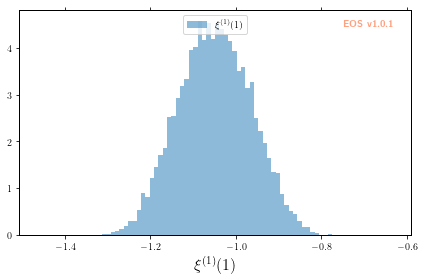

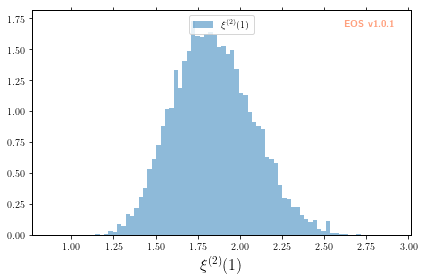

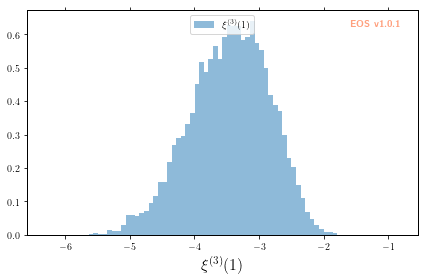

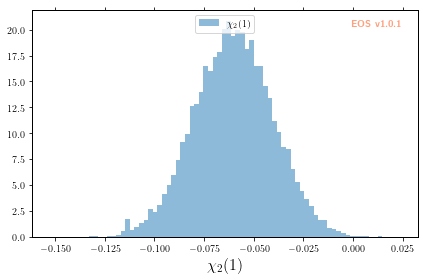

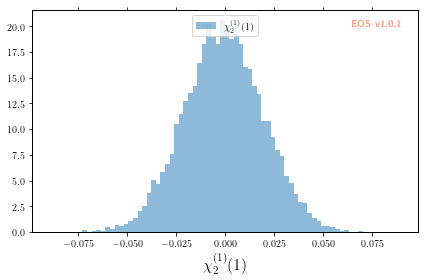

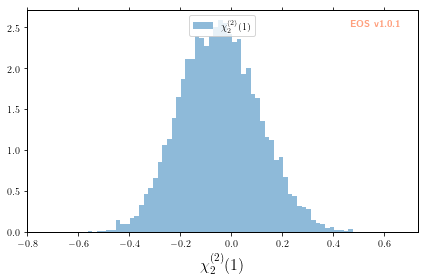

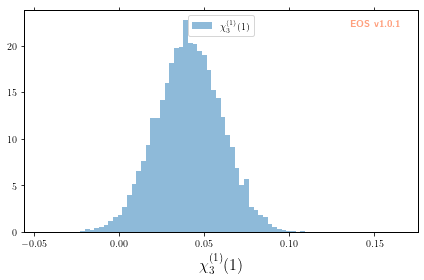

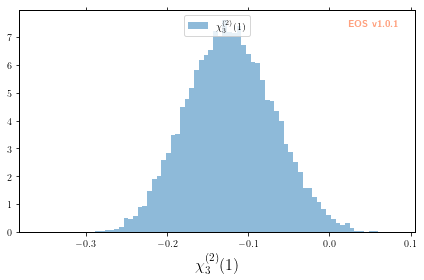

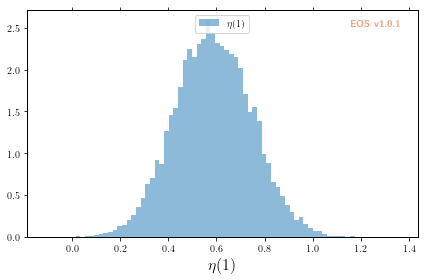

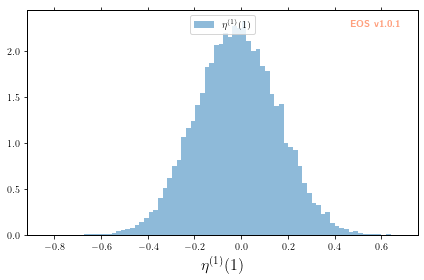

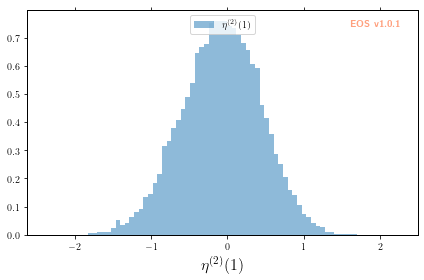

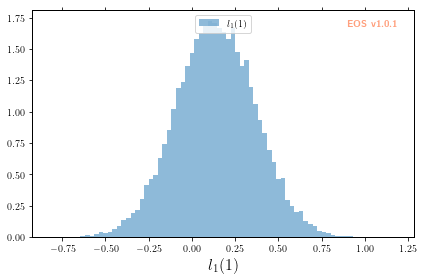

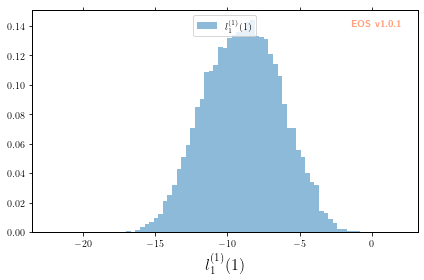

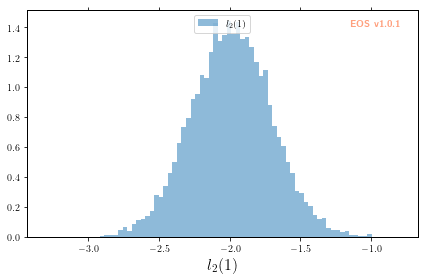

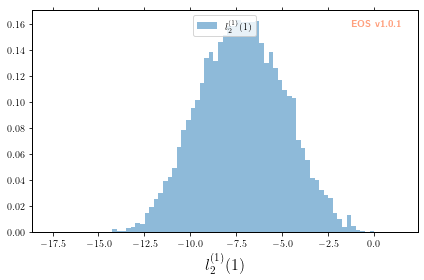

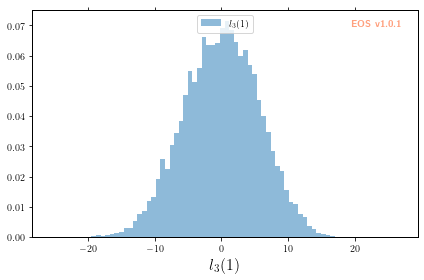

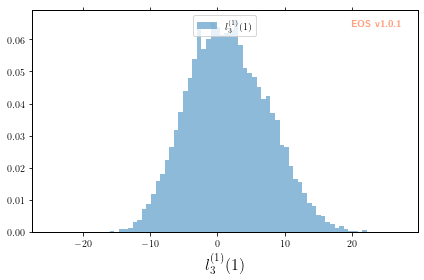

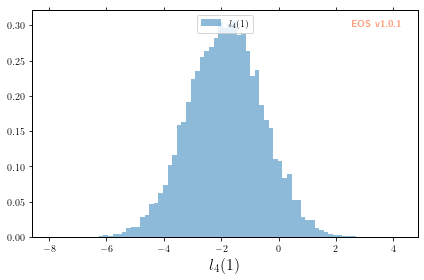

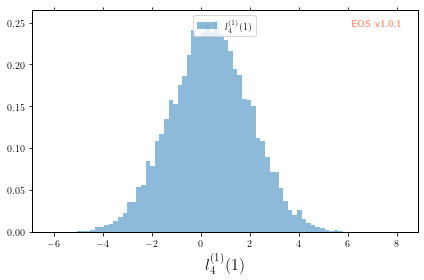

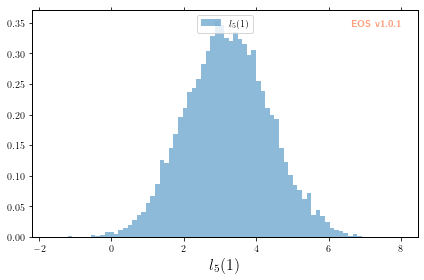

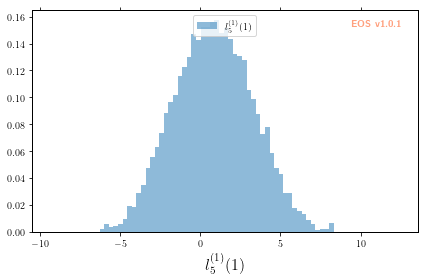

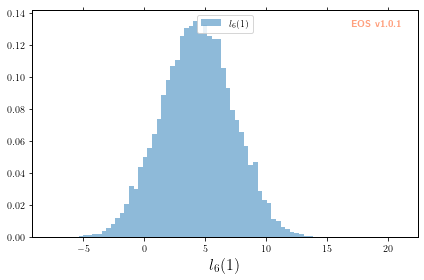

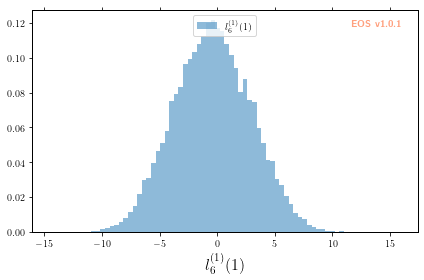

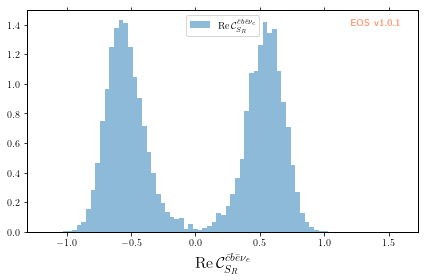

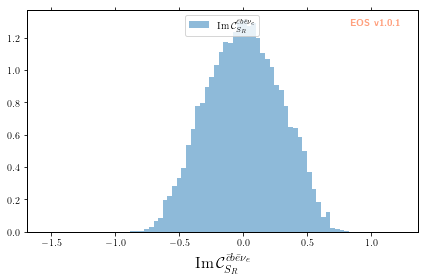

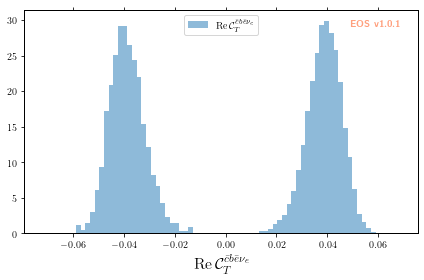

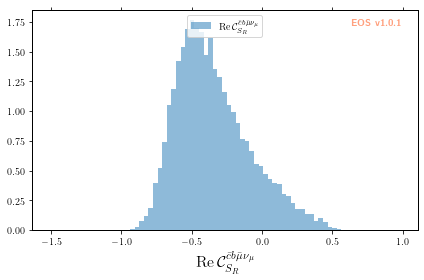

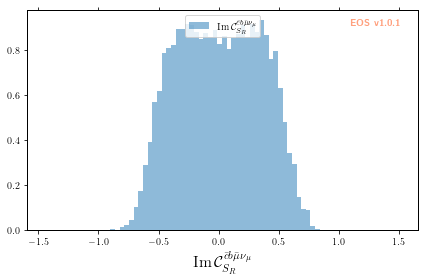

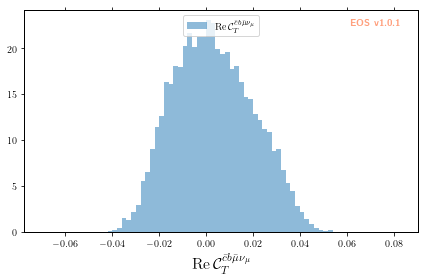

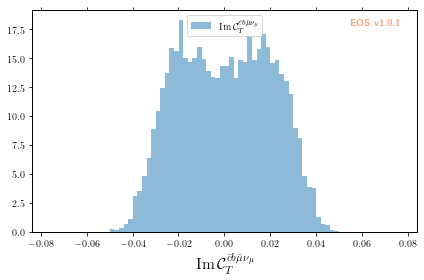

In [31]:
n_bins = 120
for i, p in enumerate(exp_analysis.varied_parameters[:]):
    print(f"i = {i}, parameter = {p.latex()}")
    print(f"    prior_min = {p.min()}, prior_max = {p.max()}")
    post_min = min(pmc_data[:, i])
    post_max = max(pmc_data[:, i])
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    if post_min < 0:
        post_min *= 1.05
    else:
        post_min *= 0.95
    if post_max < 0:
        post_max *= 0.95
    else:
        post_max *= 1.05
    print(f"    1-dim min = {post_min:3.2f}, 1-dim max = {post_max:3.2f}" )
    plot_args = {
        'plot': {
            'x': { 'label': f'{p.latex()}', 'range': [post_min,  post_max], 'format': '${x:.2f}$' },
            'legend': { 'location': 'upper center' }
        },
        'contents': [
            { 'label': f'{p.latex()}',
              'type': 'histogram', 'bins': 80,
              'data': { 'samples': pmc_data[:, i], 'weights': pmc_posterior }}
        ]
    }
    plt.rcParams['figure.figsize'] = [6, 4]
    eos.plot.Plotter(plot_args).plot()

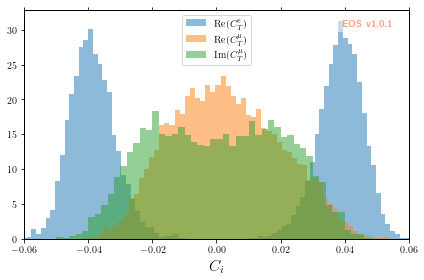

In [32]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-0.06,  0.06], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_T^e)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': pmc_data[:, 26-1], 'weights': pmc_posterior }},
        { 'label': r'${\rm Re}(C_T^\mu)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': pmc_data[:, 29-1], 'weights': pmc_posterior }},
        { 'label': r'${\rm Im}(C_T^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': pmc_data[:, 30-1], 'weights': pmc_posterior }},
    ]
}
eos.plot.Plotter(plot_args).plot()

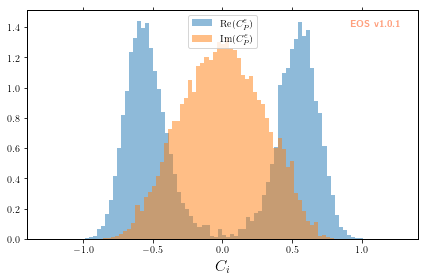

In [33]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-1.4,  1.4], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_P^e)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': pmc_data[:, 24-1], 'weights': pmc_posterior }},
        { 'label': r'${\rm Im}(C_P^e)$',
          'type': 'histogram', 'bins': 100,
          'data': { 'samples': pmc_data[:, 25-1], 'weights': pmc_posterior }},
    ]
}
eos.plot.Plotter(plot_args).plot()

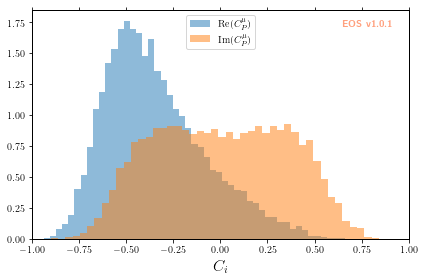

In [34]:
plot_args = {
    'plot': {
        'x': { 'label': r'$C_i$', 'range': [-1.0,  1.0], 'format': '${x:.2f}$' },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        { 'label': r'${\rm Re}(C_P^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': pmc_data[:, 27-1], 'weights': pmc_posterior }},
        { 'label': r'${\rm Im}(C_P^\mu)$',
          'type': 'histogram', 'bins': 80,
          'data': { 'samples': pmc_data[:, 28-1], 'weights': pmc_posterior }},
    
    ]
}
eos.plot.Plotter(plot_args).plot()

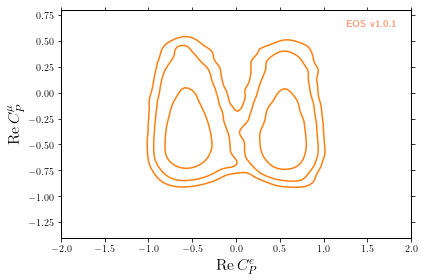

In [35]:
plot_args = {
    'plot': {
        'x': { 'label': r'${\rm Re}\,C_P^e$',   'range': [-2.0, 2.0], 'format': '${x:.2f}$' },
        'y': { 'label': r'${\rm Re}\,C_P^\mu$', 'range': [-1.4, 0.8], 'format': '${x:.2f}$' },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-2.0, 2.0], 'levels': [68, 95, 99], 'bandwidth': 0.8,
            'data': { 'samples': pmc_data[:, (24-1, 27-1)], 'weights': pmc_posterior }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()